## Import `face` dataset

In [4]:
# try to import "face" dataset from scipy with scipy 1.10 is the minimum supported version

try:
    from scipy.datasets import face
except ImportError:
    from scipy.misc import face

img = face()

In [5]:
# type of img
type(img)

numpy.ndarray

## Display the image

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

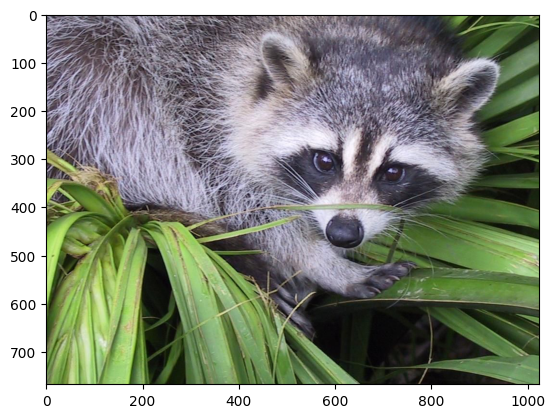

In [7]:
plt.imshow(img)
plt.show()

## Image properties

In [ ]:
# Image shape
img.shape

(768, 1024, 3)

In [9]:
# Image dimensions
img.ndim

3

In [10]:
# The red pixel data for the image
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]],
      shape=(768, 1024), dtype=uint8)

In [11]:
img_array = img/255

red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

## Operations on the image

In [12]:
from numpy import linalg

In [16]:
# the gray scale version of the image
img_gray = img_array @ [0.2989, 0.5870, 0.1140]

In [17]:
# shape of the gray scale image
img_gray.shape

(768, 1024)

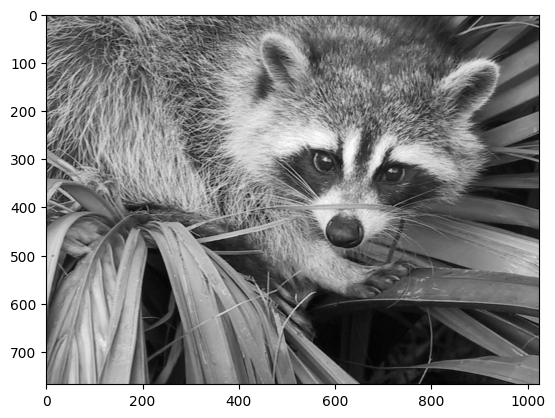

In [18]:
# display the image using matplotlib
plt.imshow(img_gray, cmap='gray')
plt.show()